## Load Data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt  # Fix import for matplotlib
import seaborn as sns
from adjustText import adjust_text


# Use a raw string to avoid escape sequence issues and specify encoding
df = pd.read_csv(r"c:/Users/rbrod/OneDrive/Documents/RB_Python_SuperStore_Project/Dataset/SuperstoreCSV.csv", encoding='ISO-8859-1')

# Convert the Order Date, and Ship Date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')

# Format Customer Name to title case
df['Customer Name'] = df['Customer Name'].str.title()

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2014-121258,2014-02-27,2014-03-04,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


<Axes: xlabel='Category'>

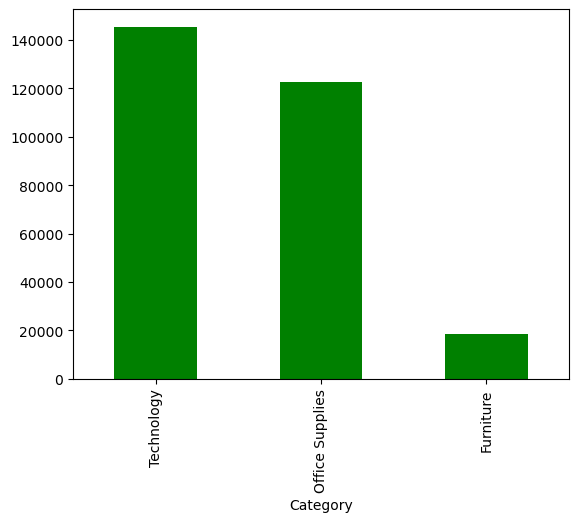

In [19]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False).plot(kind='bar', color='green')

<Axes: xlabel='Category'>

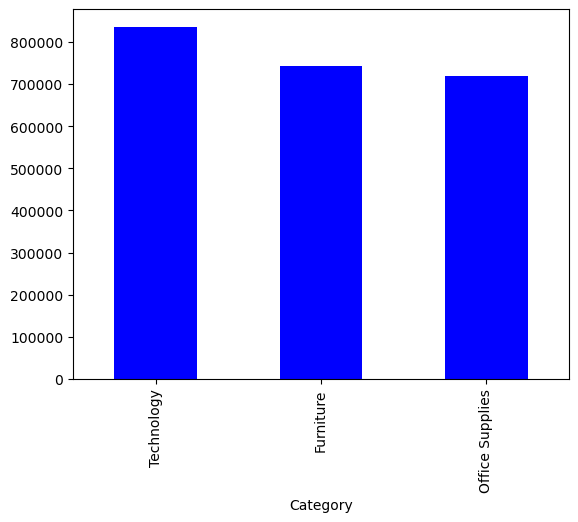

In [20]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='blue')

<Axes: xlabel='Product Name'>

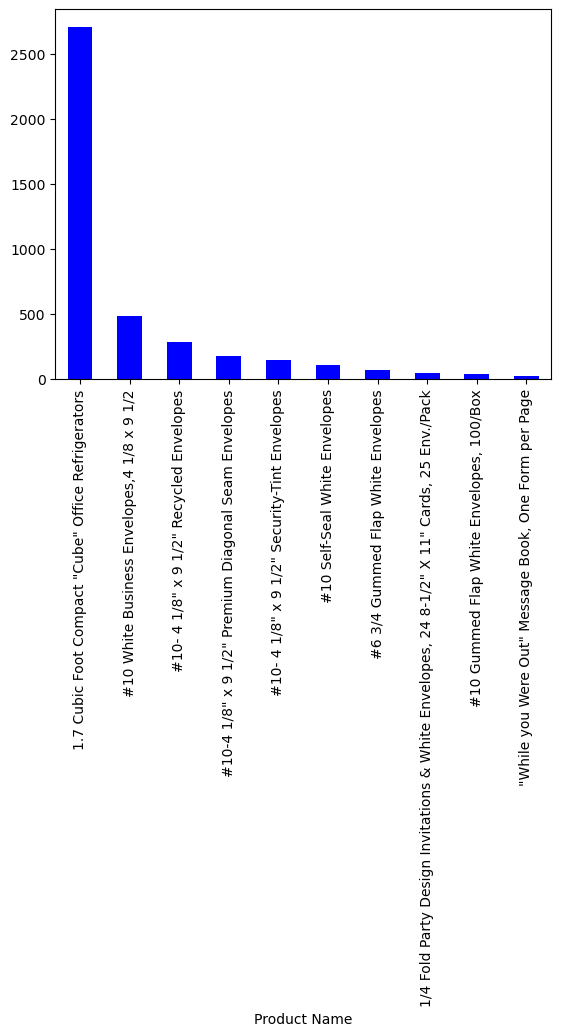

In [26]:

df.groupby('Product Name')['Sales'].sum().head(10).sort_values(ascending=False).plot(kind='bar', color='blue')

<Axes: xlabel='City'>

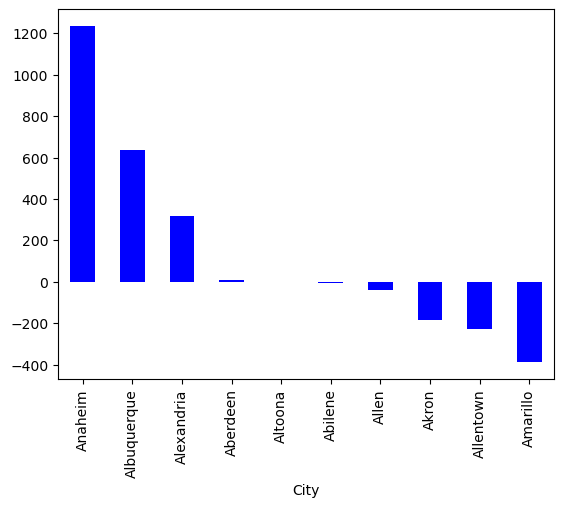

In [30]:
df.groupby('City')['Profit'].sum().head(10).sort_values(ascending=False).plot(kind='bar', color='blue')


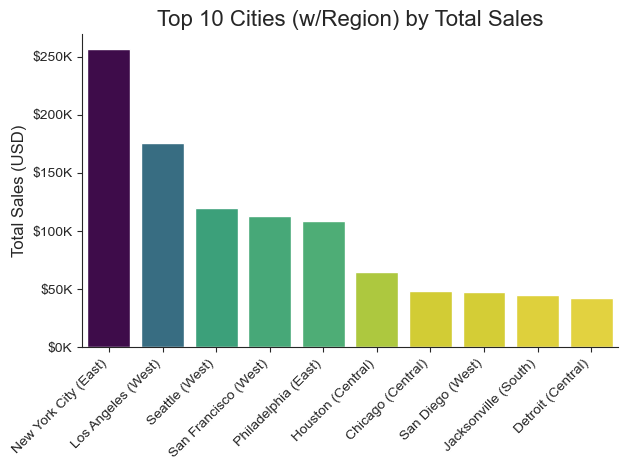

In [29]:
import matplotlib.ticker as mticker

# Group by City and Region to get total Sales
city_sales = df.groupby(['City', 'Region'])['Sales'].sum().reset_index()

# Sort the cities by total sales in descending order and get the top 10
top_10_cities = city_sales.sort_values(by='Sales', ascending=False).head(10)

# Create a new column: "City (Region)"
top_10_cities['City (Region)'] = top_10_cities['City'] + ' (' + top_10_cities['Region'] + ')'

# Plot the bar chart using the new 'City (Region)' column
sns.barplot(x='City (Region)', y='Sales', data=top_10_cities, hue='Sales', palette='viridis_r', legend=False)

# Rotate and align x-axis labels to the left
plt.xticks(rotation=45, ha='right', fontsize=10)

# Format the y-axis
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xlabel('')
plt.title('Top 10 Cities (w/Region) by Total Sales', fontsize=16)
plt.grid(False)

# Format the y-axis labels in $K
def currency_format(x, _):
    return f'${int(x // 1000)}K'
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

# Remove borders and set styling
sns.despine()
sns.set_style('ticks')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

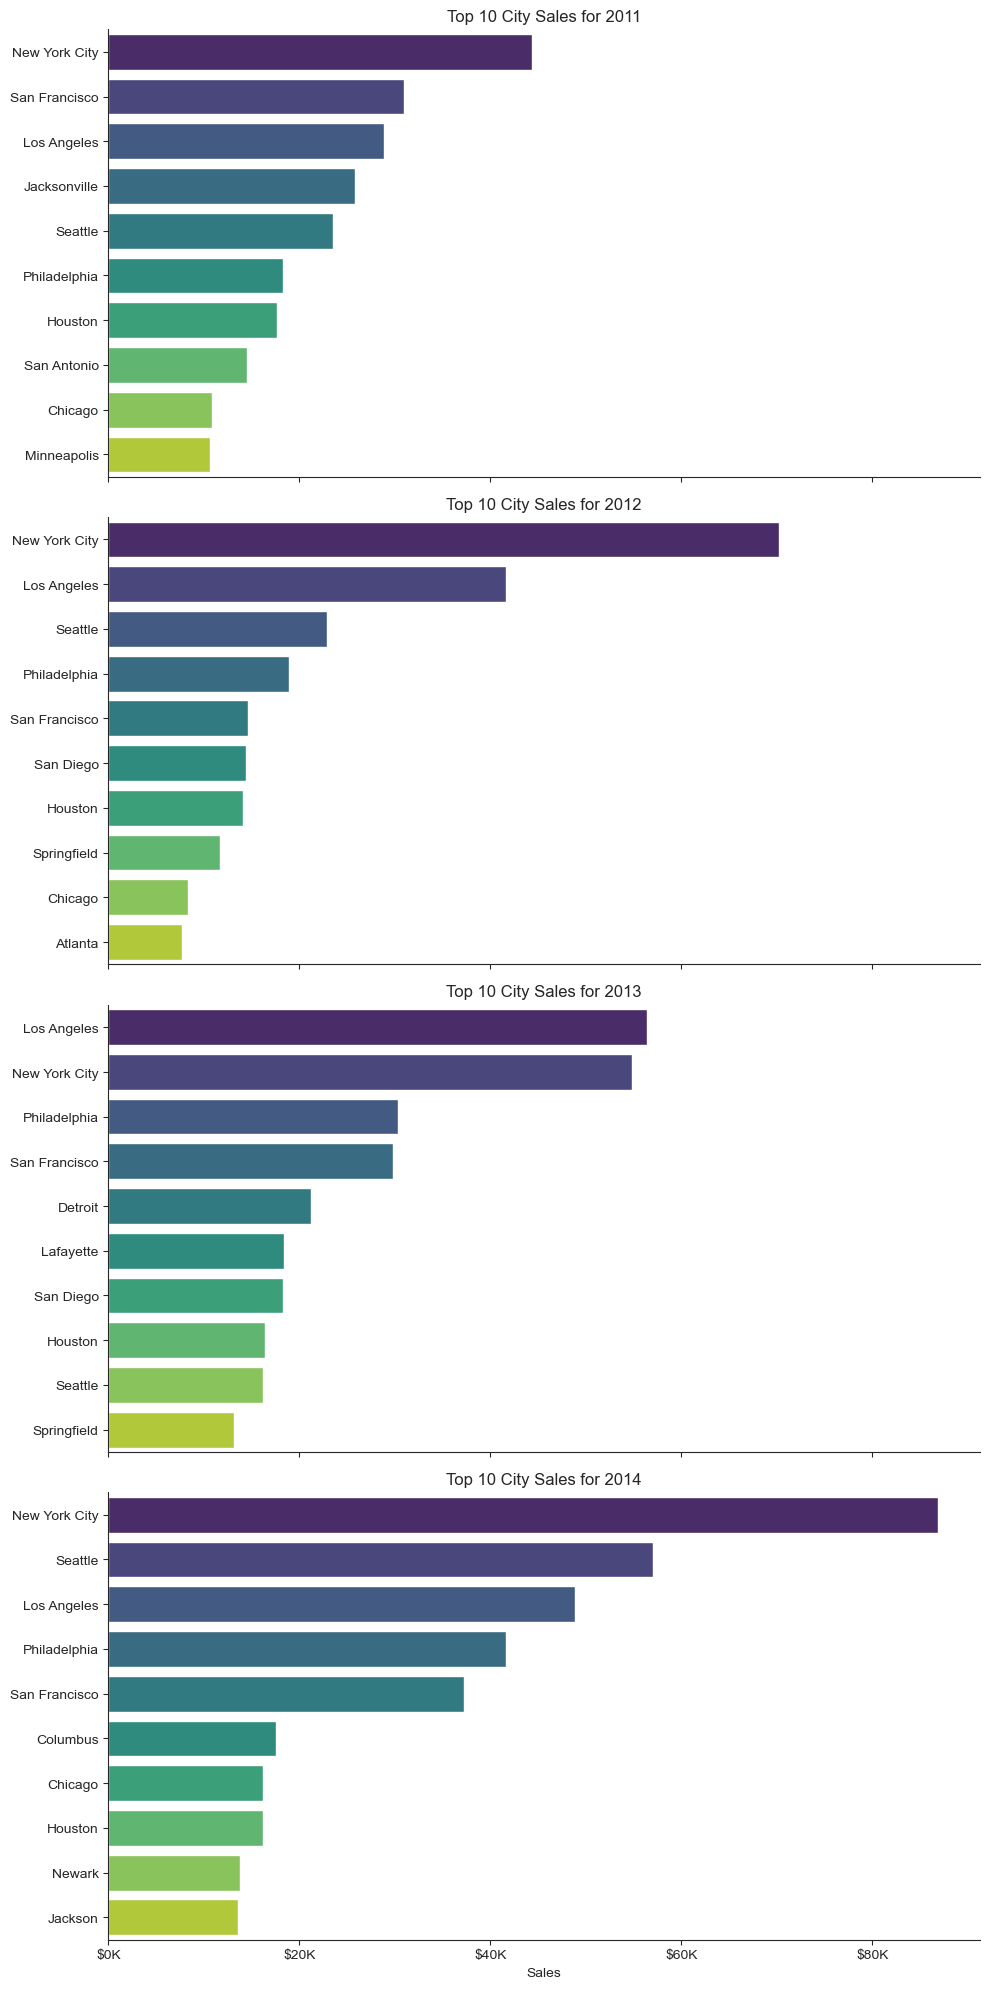

In [73]:
# Filter for the years 2011 to 2014
df['Year'] = df['Order Date'].dt.year
df_filtered = df[df['Year'].isin([2011, 2012, 2013, 2014])]

# Aggregate sales by city and year
sales_by_city_year = df_filtered.groupby(['City', 'Year'])['Sales'].sum().reset_index()

# Get top 10 cities for each year
top_cities = (sales_by_city_year
              .sort_values(by=['Year', 'Sales'], ascending=[True, False])
              .groupby('Year')
              .head(10)
              .reset_index(drop=True))


# Set up the figure and axes for subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 20), sharex=True)

# Years to plot
years = [2011, 2012, 2013, 2014]

# Create horizontal bar charts for each year
for ax, year in zip(axs, years):
    data = top_cities[top_cities['Year'] == year]
    sns.barplot(x='Sales', y='City', data=data, ax=ax, orient='h', palette='viridis', hue='City')
    ax.set_title(f'Top 10 City Sales for {year}')
    ax.set_xlabel('Sales')
    ax.set_ylabel('')

#format the Sales Labels
def currency_format(y, _):
    return f'${int(y // 1000)}K'
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

# Adjust layout
sns.despine()
plt.tight_layout()
plt.show()

In [60]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2011-01-04 00:00:00'), Timestamp('2014-12-31 00:00:00'))

In [76]:
df['Sub-Category'].unique()


array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

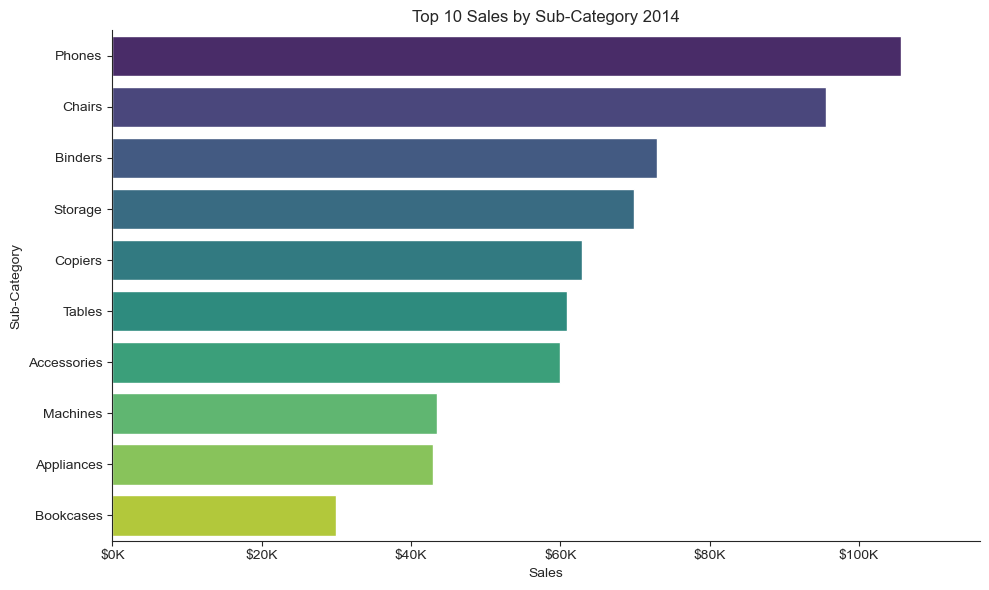

In [83]:
# Filter for the year 2014
df['Year'] = df['Order Date'].dt.year
df_2014 = df[df['Year'] == 2014]

# Aggregate sales by Sub-Category
sales_by_subcategory = df_2014.groupby('Sub-Category')['Sales'].sum().reset_index()

# Get top 10 Sub-Categories
top_subcategories = sales_by_subcategory.nlargest(10, 'Sales')



# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Sub-Category', data=top_subcategories, orient='h', hue='Sub-Category', palette='viridis')
plt.title('Top 10 Sales by Sub-Category 2014')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.xlim(0, top_subcategories['Sales'].max() * 1.1)  # Optional: extend x-axis for better spacing

#format the Sales Labels
def currency_format(y, _):
    return f'${int(y // 1000)}K'
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

# Show the plot
sns.despine()
plt.tight_layout()
plt.show()

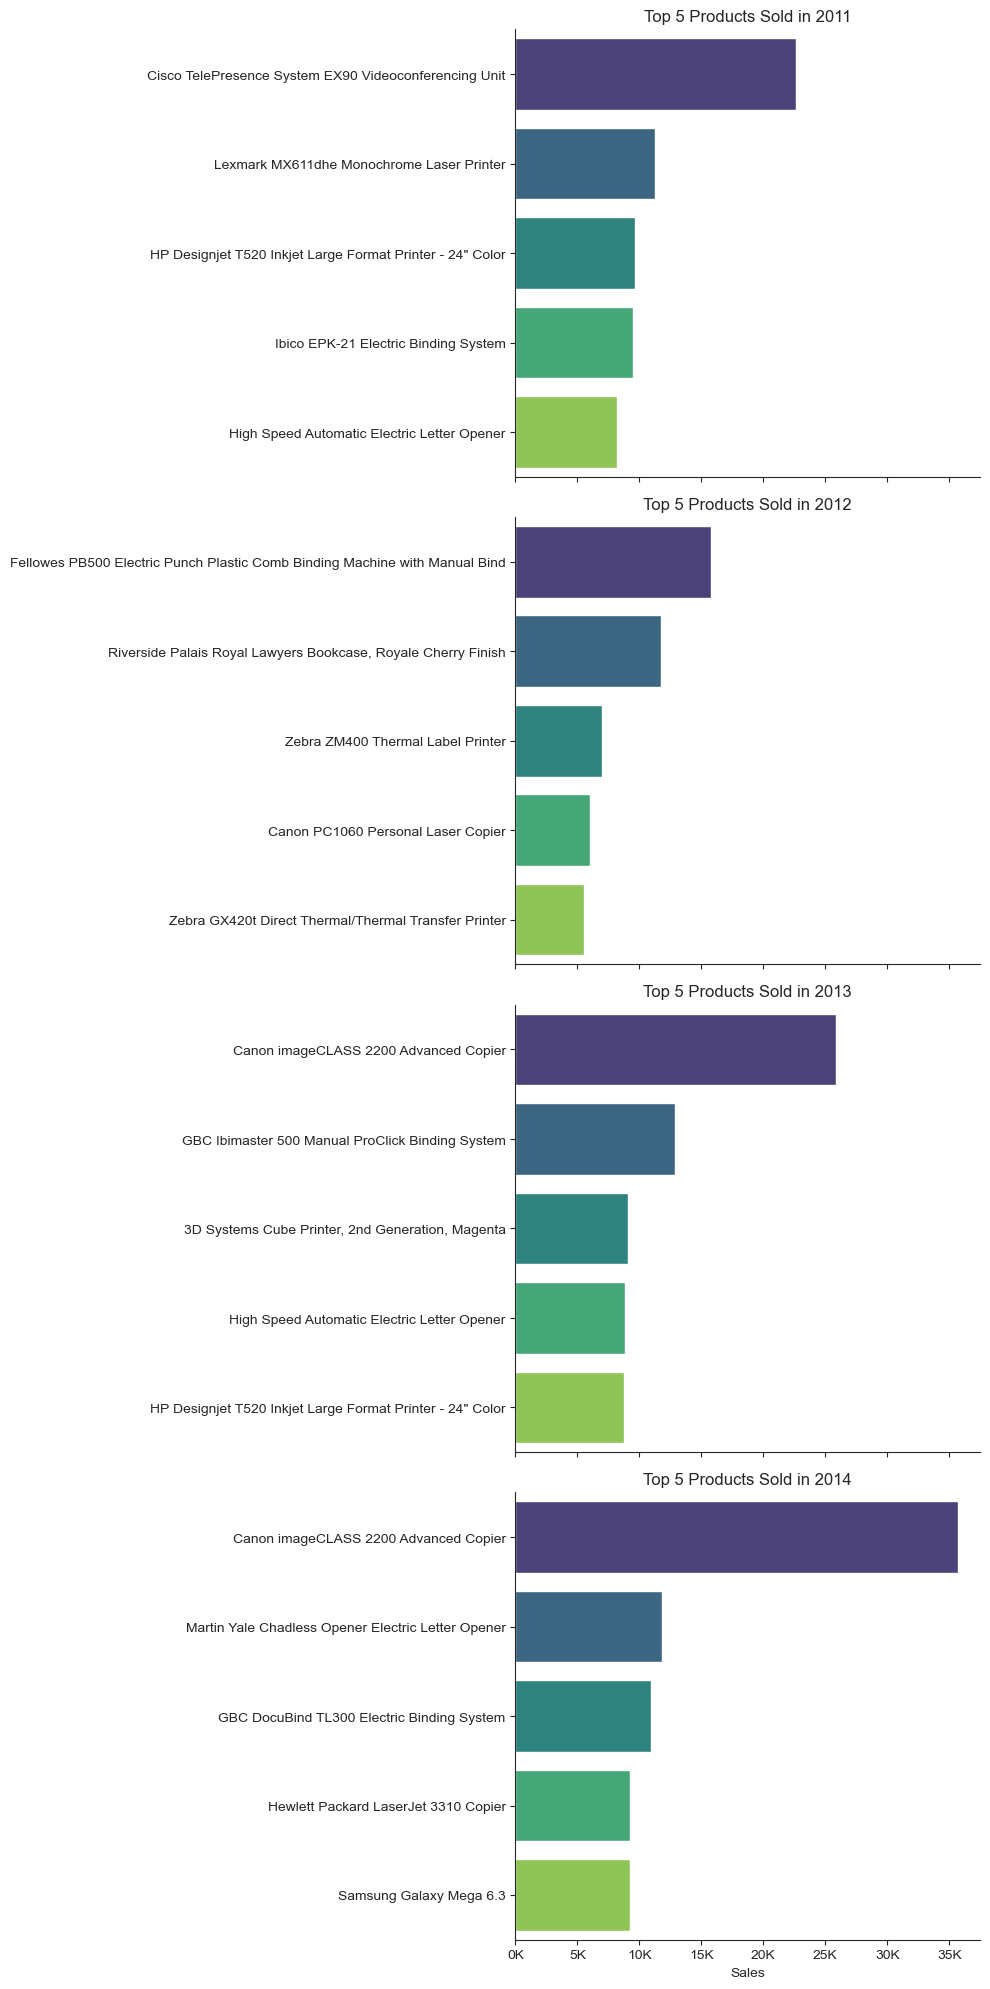

In [89]:
# Filter for the years 2011 to 2014
df['Year'] = df['Order Date'].dt.year
df_filtered = df[df['Year'].isin([2011, 2012, 2013, 2014])]

# Aggregate sales by Product Name and Year
sales_by_product_year = df_filtered.groupby(['Product Name', 'Year'])['Sales'].sum().reset_index()

# Get top 5 products for each year
top_products = (sales_by_product_year
                .sort_values(by=['Year', 'Sales'], ascending=[True, False])
                .groupby('Year')
                .head(5)
                .reset_index(drop=True))



# Set up the figure and axes for subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 20), sharex=True)

# Years to plot
years = [2011, 2012, 2013, 2014]

# Create horizontal bar charts for each year
for ax, year in zip(axs, years):
    data = top_products[top_products['Year'] == year]
    sns.barplot(x='Sales', y='Product Name', data=data, ax=ax, orient='h', hue='Product Name', palette='viridis')
    ax.set_title(f'Top 5 Products Sold in {year}')
    ax.set_xlabel('Sales')
    ax.set_ylabel('')

#format the Sales Labels
def currency_format(y, _):
    return f'{int(y // 1000)}K'
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))    

# Adjust layout
sns.despine()
plt.tight_layout()
plt.show()

### Chart Top 10 Customers by Sales 2014

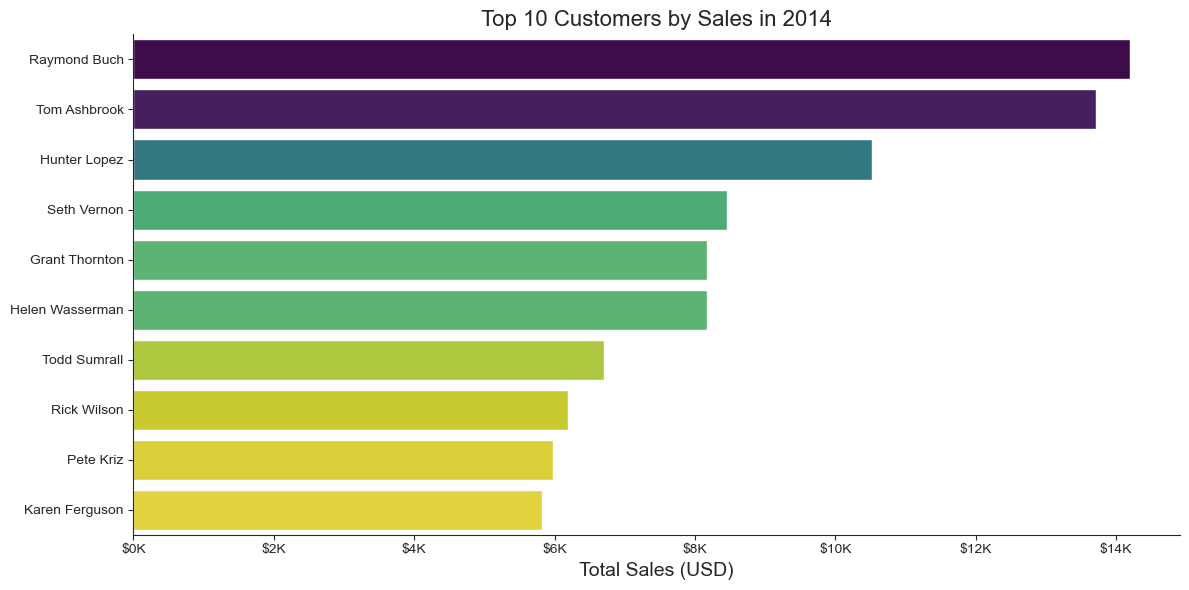

In [41]:
# Extract Year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Filter for the year 2014
df_2014 = df[df['Year'] == 2014]

# Group by Customer Name and sum the sales
customer_sales_2014 = df_2014.groupby('Customer Name')['Sales'].sum().reset_index()

# Get the top 10 customers by sales
top_10_customers = customer_sales_2014.sort_values(by='Sales', ascending=False).head(10)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Customer Name', data=top_10_customers, palette='viridis_r', hue='Sales', legend=False)

# Format the x-axis with dollar amounts
def currency_format(x, _):
    return f'${int(x // 1000)}K'
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(currency_format))

# Chart aesthetics
plt.title('Top 10 Customers by Sales in 2014', fontsize=16)
plt.xlabel('Total Sales (USD)', fontsize=14)
plt.ylabel('')

# Adjust layout for better spacing
plt.tight_layout()
sns.despine()

# Display the plot
plt.show()

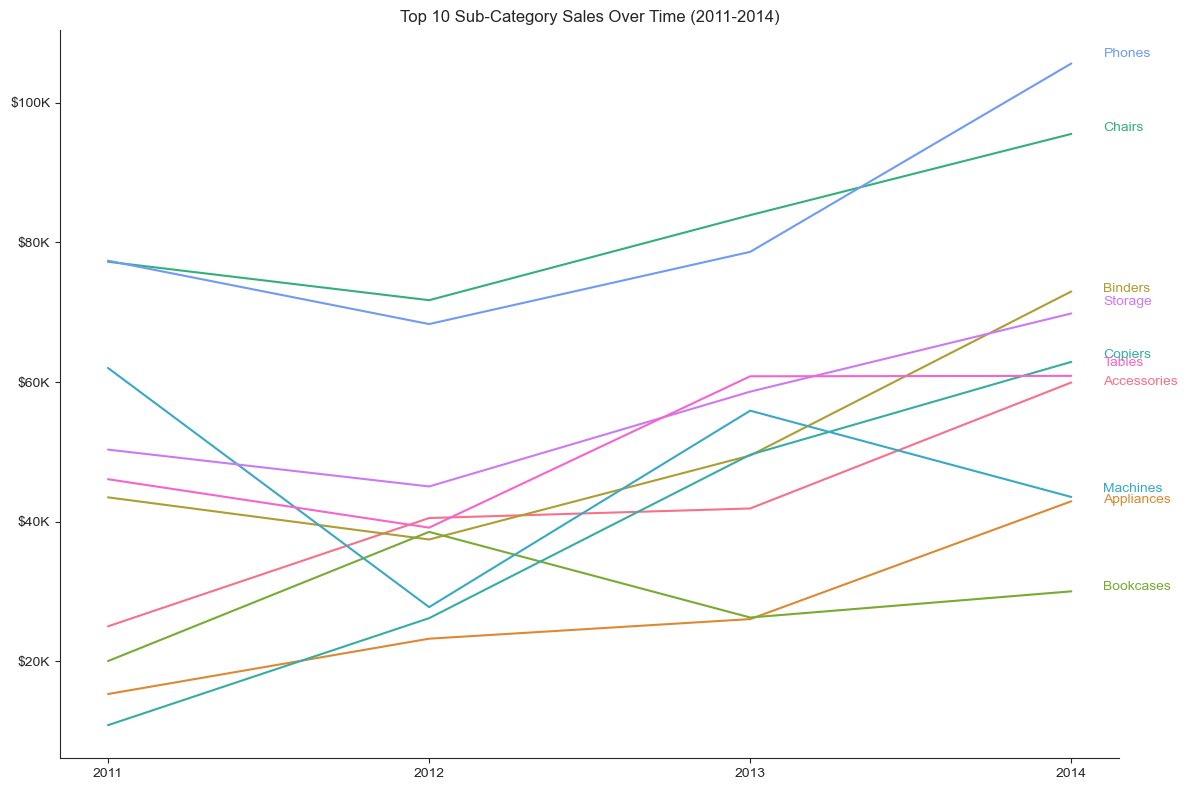

In [107]:
# Filter for the years 2011 to 2014
df['Year'] = df['Order Date'].dt.year
df_filtered = df[df['Year'].isin([2011, 2012, 2013, 2014])]

# Aggregate sales by Sub-Category and Year
sales_by_subcategory_year = df_filtered.groupby(['Sub-Category', 'Year'])['Sales'].sum().reset_index()

# Get the top 10 sub-categories based on total sales over the entire period
top_subcategories = (sales_by_subcategory_year
                     .groupby('Sub-Category')['Sales']
                     .sum()
                     .nlargest(10)
                     .index)

# Filter sales data for top 10 sub-categories
top_sales_by_subcategory_year = sales_by_subcategory_year[sales_by_subcategory_year['Sub-Category'].isin(top_subcategories)]

# Pivot the data to have years as columns
pivot_sales = top_sales_by_subcategory_year.pivot(index='Year', columns='Sub-Category', values='Sales').fillna(0)

# Set the color palette with distinct colors for 10 categories
palette = sns.color_palette("husl", len(top_subcategories))  # Using the "husl" palette for distinct colors

# Create a line plot for top sub-category sales over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_sales, dashes=False, palette=palette)
plt.title('Top 10 Sub-Category Sales Over Time (2011-2014)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(pivot_sales.index)  # Set x-ticks to the years


# Add labels for each sub-category at the end of each line with spacing
y_offsets = [0] * len(pivot_sales.columns)  # Initialize y offsets

for i, col in enumerate(pivot_sales.columns):
    # Calculate dynamic offset to avoid overlap
    y_offset = 200 * i - y_offsets[i]  # Adjust label height based on index
    y_pos = pivot_sales[col].iloc[-1] + y_offset
    
    # Set the y offset for the next label to ensure separation
    y_offsets[i] = y_offset + 5  # Increment offset for the next label

    # Add the text label
    plt.text(x=pivot_sales.index[-1] + 0.1,  # Shift x position slightly to the right
             y=y_pos,
             s=col,
             ha='left',
             va='center',
             fontsize=10,
             color=palette[i])  # Use the same color as the line

# Remove the legend
plt.gca().get_legend().remove()

def currency_format(x, _):
    return f'${int(x // 1000)}K'
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

# Adjust layout
sns.despine()
plt.tight_layout()
plt.show()

### Top 5 Products Sold in Top 3 Sub-Categories 2014

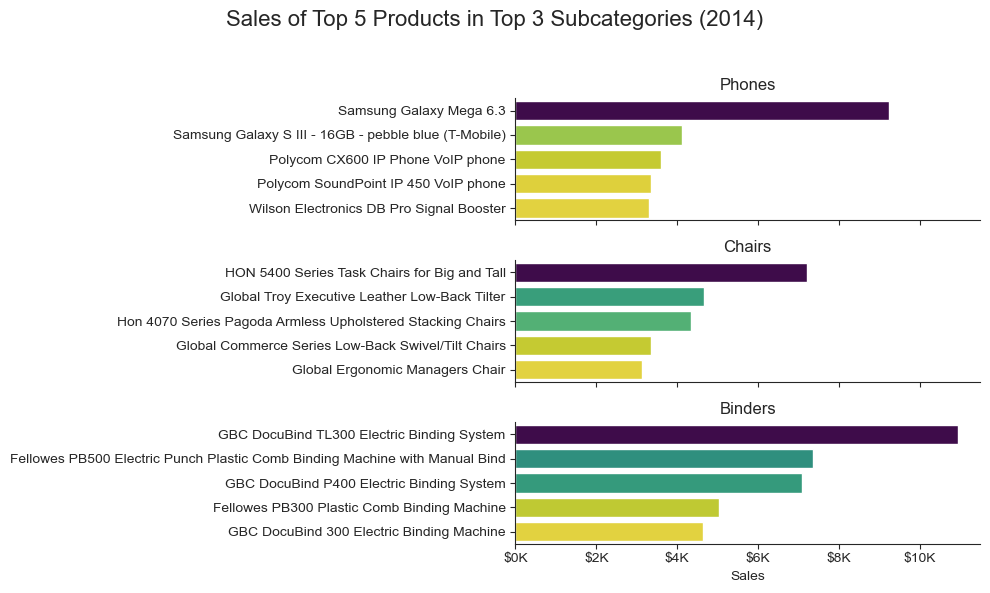

In [49]:
# Filter for the year 2014
df['Year'] = df['Order Date'].dt.year
df_filtered = df[(df['Year'].isin([2014])) & (df['Sub-Category'].isin(['Phones', 'Chairs', 'Binders']))]

# Filter for the year 2014
df['Year'] = df['Order Date'].dt.year
df_filtered = df[(df['Year'] == 2014) & (df['Sub-Category'].isin(['Phones', 'Chairs', 'Binders']))]

# Get top 5 products in each specified subcategory
top_products = df_filtered.groupby(['Sub-Category', 'Product Name'])['Sales'].sum().reset_index()
top_products = (
    top_products
    .sort_values(by='Sales', ascending=False)
    .groupby('Sub-Category')
    .head(5)
    .reset_index(drop=True)
)

# Define the custom order for subcategories
subcategory_order = ['Phones', 'Chairs', 'Binders']

# Create a figure with subplots
fig, axes = plt.subplots(len(subcategory_order), 1, figsize=(10, 6), sharex=True)
fig.suptitle('Sales of Top 5 Products in Top 3 Subcategories (2014)', fontsize=16)

for ax, subcategory in zip(axes, subcategory_order):
    # Filter for the current subcategory
    subcategory_data = top_products[top_products['Sub-Category'] == subcategory]
    
    # Plot horizontal bar chart for the top products
    sns.barplot(x='Sales', y='Product Name', data=subcategory_data, ax=ax, hue='Sales', palette='viridis_r', legend=False)
    ax.set_title(subcategory)
    ax.set_ylabel('')
    ax.set_xlabel('Sales')  # X-axis label
    ax.tick_params(axis='y')  # Adjust y-axis ticks for better visibility

# Add a common x-label for the bottom subplot
axes[-1].set_xlabel('Sales')

# Format the Sales Labels
def currency_format(y, _):
    return f'${int(y // 1000)}K'
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

### Histogram Customer Orders

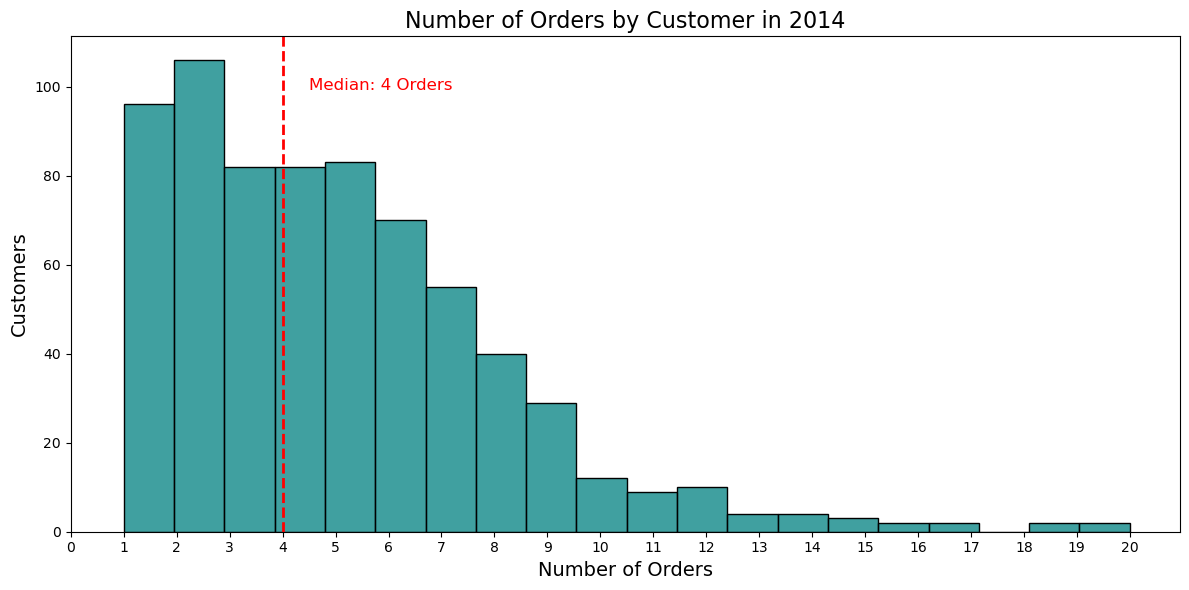

In [10]:
# Extract Year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Filter for the year 2014
df_2014 = df[df['Year'] == 2014]

# Count the number of orders by Customer Name
orders_by_customer = df_2014['Customer Name'].value_counts().reset_index()
orders_by_customer.columns = ['Customer Name', 'Order Count']

# Calculate the median order count
median_order_count = orders_by_customer['Order Count'].median()

# Plot a histogram (bar plot) of the number of orders by customer
plt.figure(figsize=(12, 6))
sns.histplot(orders_by_customer['Order Count'], bins=20, color='teal')

# Add a median line
plt.axvline(median_order_count, color='red', linestyle='--', linewidth=2)

# Label the median line
plt.text(median_order_count + 0.5, plt.gca().get_ylim()[1] * 0.9, 
         f'Median: {int(median_order_count)} Orders', 
         color='red', fontsize=12, ha='left', va='center')

# Add titles and labels
plt.title('Number of Orders by Customer in 2014', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Customers', fontsize=14)

# Set x-ticks to whole numbers
plt.xticks(range(0, int(orders_by_customer['Order Count'].max()) + 1, 1))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Overview Chart Sales, Profit, Orders

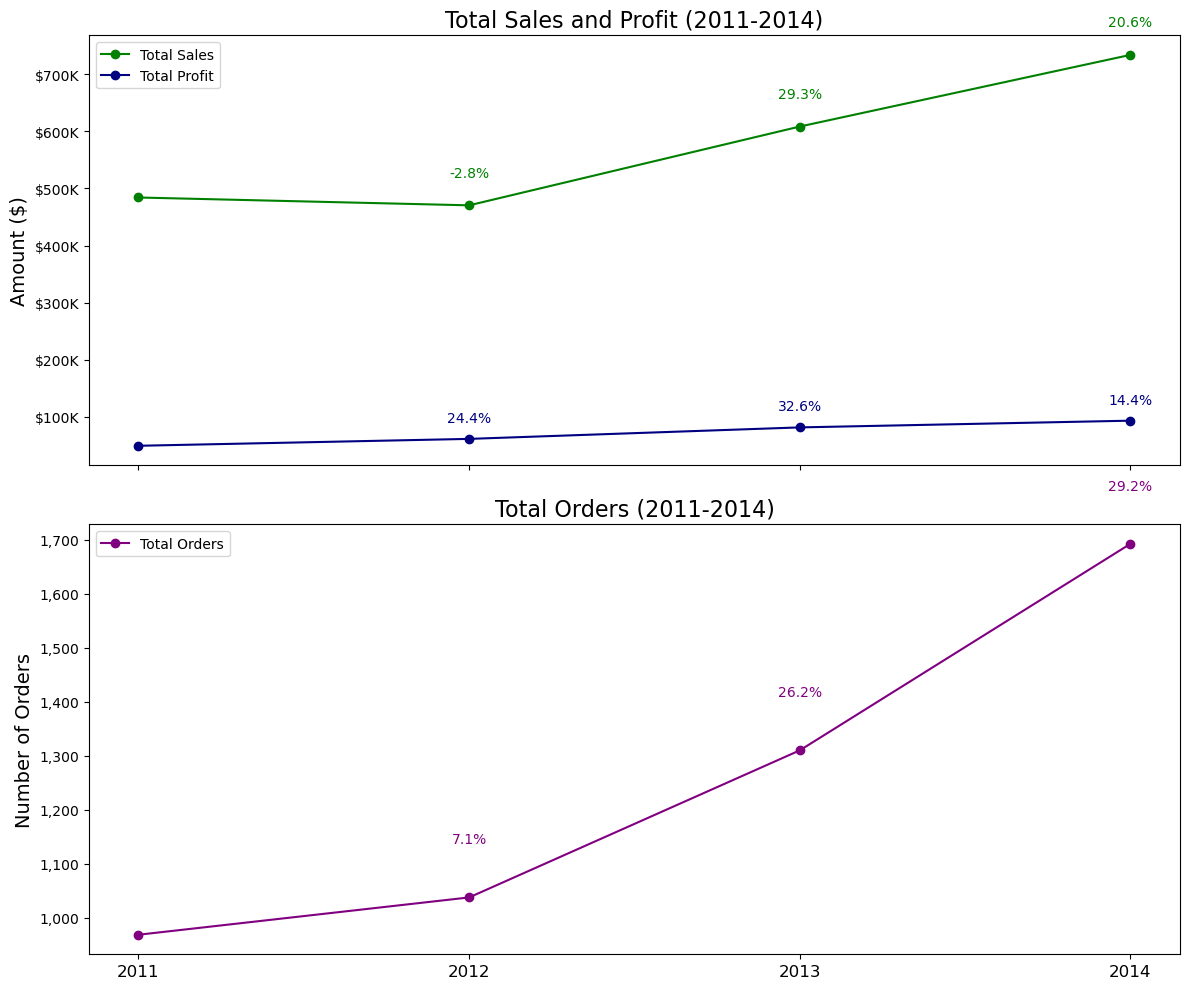

In [12]:
# Extract Year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Group by Year to aggregate metrics
yearly_summary = df.groupby('Year').agg(
    Orders=('Order ID', 'nunique'),  # Count of unique orders
    Sales=('Sales', 'sum'),          # Total sales
    Profit=('Profit', 'sum')         # Total profit
).reset_index()

# Calculate Year-over-Year growth percentages
yearly_summary['Sales Growth %'] = yearly_summary['Sales'].pct_change() * 100
yearly_summary['Profit Growth %'] = yearly_summary['Profit'].pct_change() * 100
yearly_summary['Order Growth %'] = yearly_summary['Orders'].pct_change() * 100

# Set up the figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Sales and Profit on the first subplot
ax1.plot(yearly_summary['Year'], yearly_summary['Sales'], label='Total Sales', marker='o', linestyle='-', color='green')
ax1.plot(yearly_summary['Year'], yearly_summary['Profit'], label='Total Profit', marker='o', linestyle='-', color='navy')
ax1.set_title('Total Sales and Profit (2011-2014)', fontsize=16)
ax1.set_ylabel('Amount ($)', fontsize=14)
ax1.legend()

# Format y-axis for Sales and Profit subplot (e.g., $600K, $500K)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x / 1_000):,}K'))

# Add growth labels with upward offset for Sales and Profit
for i in range(1, len(yearly_summary)):
    ax1.text(
        yearly_summary['Year'][i], yearly_summary['Sales'][i] + 50_000,  # Offset by 50,000
        f'{yearly_summary["Sales Growth %"][i]:.1f}%', 
        ha='center', color='green', fontsize=10
    )
    ax1.text(
        yearly_summary['Year'][i], yearly_summary['Profit'][i] + 30_000,  # Offset by 30,000
        f'{yearly_summary["Profit Growth %"][i]:.1f}%', 
        ha='center', color='navy', fontsize=10
    )

# Plot Total Orders on the second subplot
ax2.plot(yearly_summary['Year'], yearly_summary['Orders'], label='Total Orders', marker='o', linestyle='-', color='purple')
ax2.set_title('Total Orders (2011-2014)', fontsize=16)
ax2.set_ylabel('Number of Orders', fontsize=14)
ax2.legend()

# Format y-axis for Orders with commas
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add growth labels with upward offset for Orders
for i in range(1, len(yearly_summary)):
    ax2.text(
        yearly_summary['Year'][i], yearly_summary['Orders'][i] + 100,  # Offset by 100
        f'{yearly_summary["Order Growth %"][i]:.1f}%', 
        ha='center', color='purple', fontsize=10
    )

# Set x-ticks and labels for years
ax2.set_xticks(yearly_summary['Year'])
ax2.set_xticklabels(['2011', '2012', '2013', '2014'], fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

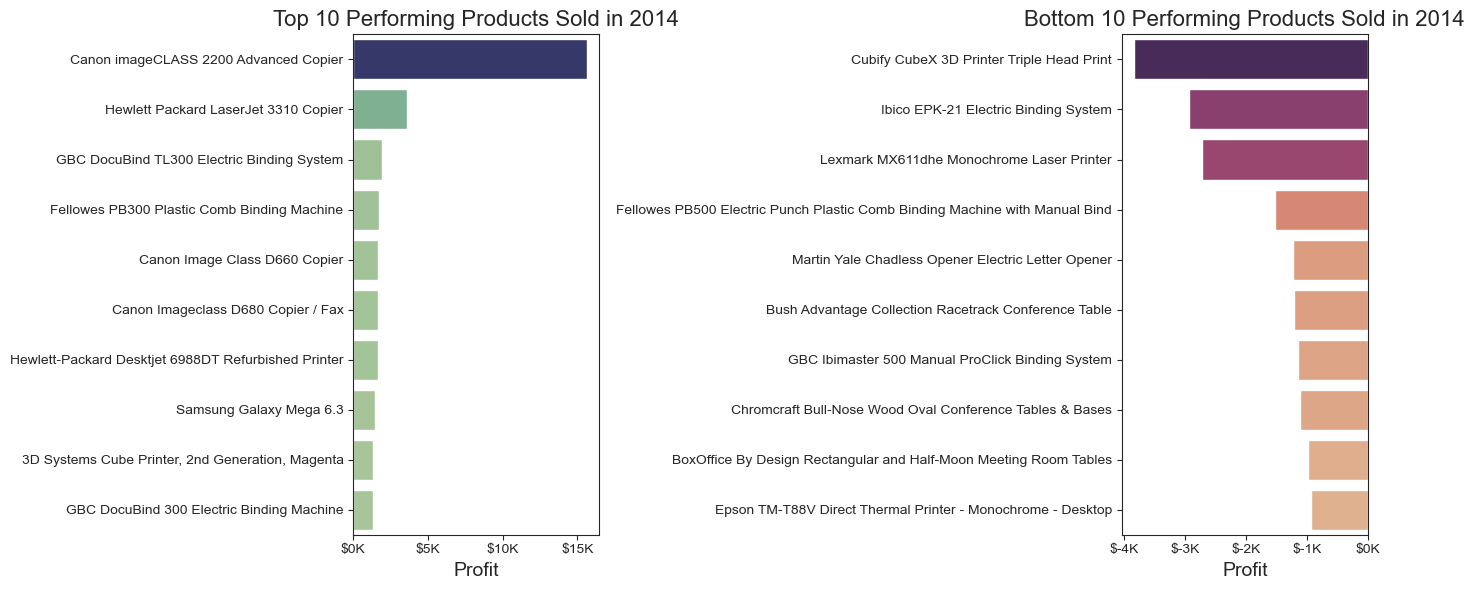

In [17]:
# Filter for the year 2014
df['Year'] = df['Order Date'].dt.year
df_2014 = df[df['Year'] == 2014].copy()

# Group by Product Name and sum the profits
product_sales_2014 = df_2014.groupby('Product Name')['Profit'].sum().reset_index()

# Get the 10 best performing products by profits
best_products = product_sales_2014.nlargest(10, 'Profit')

# Get the 10 worst performing products by profits
worst_products = product_sales_2014.nsmallest(10, 'Profit')

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for the top 10 products
sns.barplot(x='Profit', y='Product Name', data=best_products, hue='Profit', palette='crest', ax=axes[0], orient='h')
axes[0].set_title('Top 10 Performing Products Sold in 2014', fontsize=16)
axes[0].set_xlabel('Profit', fontsize=14)
axes[0].set_ylabel('')
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

# Plot for the bottom 10 products
sns.barplot(x='Profit', y='Product Name', data=worst_products, hue='Profit', palette='flare_r', ax=axes[1], orient='h')
axes[1].set_title('Bottom 10 Performing Products Sold in 2014', fontsize=16)
axes[1].set_xlabel('Profit', fontsize=14)
axes[1].set_ylabel('')
axes[1].xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

# Remove legends from both plots
axes[0].legend_.remove()
axes[1].legend_.remove()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

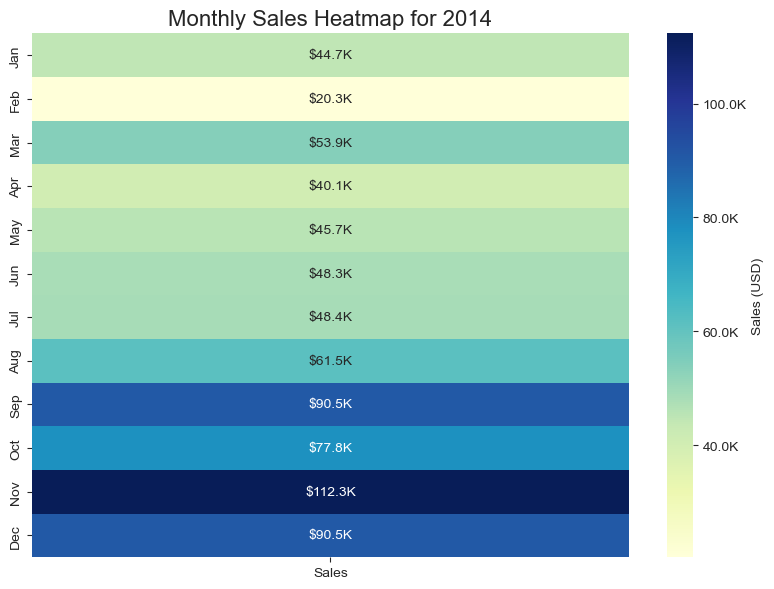

In [20]:
# Filter for 2014 data only
df_2014 = df[df['Order Date'].dt.year == 2014].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Extract Month from 'Order Date' safely using .loc
df_2014.loc[:, 'Month'] = df_2014['Order Date'].dt.month

# Group by Month and sum the Sales
monthly_sales = df_2014.groupby('Month')['Sales'].sum().reset_index()

# Pivot the data for the heatmap
sales_matrix = monthly_sales.pivot_table(index='Month', values='Sales')

# Month names for the x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a function to format sales values in $10K format
def k_format(x, pos):
    return f'{x/1000:.1f}K'

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    sales_matrix, 
    annot=True, 
    fmt='.1f', 
    cmap='YlGnBu', 
    cbar_kws={'label': 'Sales (USD)', 'format': plt.FuncFormatter(k_format)},
    yticklabels=month_names  # Use month names for y-ticks
)

# Customize the annotation text inside the heatmap
for text in plt.gca().texts:
    value = float(text.get_text())  # Get the annotation value
    text.set_text(f'${value/1000:.1f}K')  # Convert to $10K format

# Set the title and labels
plt.title('Monthly Sales Heatmap for 2014', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Adjust layout and display the heatmap
plt.tight_layout()
plt.show()

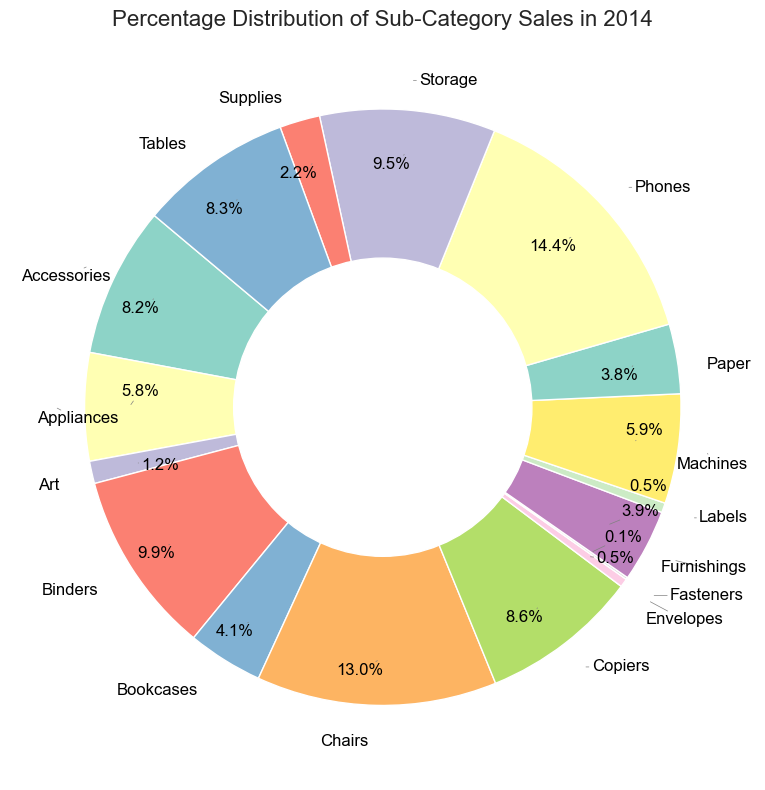

In [24]:
# Filter for the year 2014
df['Year'] = df['Order Date'].dt.year
df_2014 = df[df['Year'] == 2014]

# Group by Sub-Category and sum the sales
sub_category_sales = df_2014.groupby('Sub-Category')['Sales'].sum().reset_index()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    sub_category_sales['Sales'], 
    labels=sub_category_sales['Sub-Category'], 
    autopct='%1.1f%%', 
    startangle=140, 
    pctdistance=0.85, 
    colors=plt.cm.Set3.colors
)

# Format text labels
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_color('black')

# Adjust text positions to prevent overlap
adjust_text(texts + autotexts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Add a title
plt.title('Percentage Distribution of Sub-Category Sales in 2014', fontsize=16)

# Optional: Create a donut chart by adding a white circle at the center
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

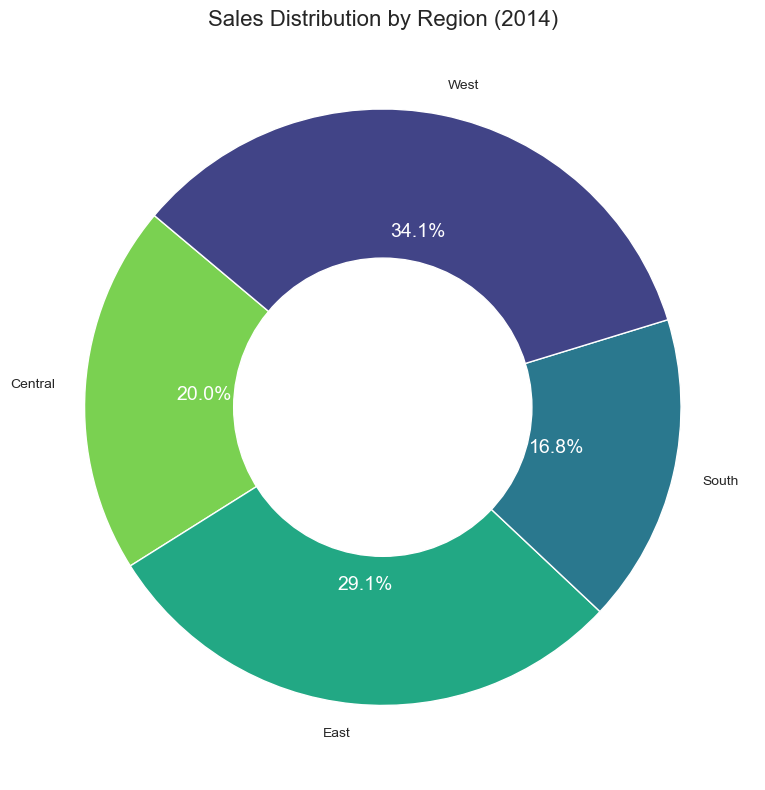

In [50]:
# Filter for the year 2014
df['Year'] = df['Order Date'].dt.year
df_2014 = df[df['Year'] == 2014]

# Group by Region and sum the sales
region_sales_2014 = df_2014.groupby('Region')['Sales'].sum().reset_index()

# Create a pie chart and convert it to a donut plot by adding a white circle in the center
plt.figure(figsize=(8, 8))
colors = sns.color_palette('viridis_r', len(region_sales_2014))

# Plot the pie chart
wedges, texts, autotexts = plt.pie(
    region_sales_2014['Sales'], 
    labels=region_sales_2014['Region'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Style the percentage labels: white color and larger font
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

# Add a white circle to make it a donut plot
center_circle = plt.Circle((0, 0), 0.50, color='white')
plt.gca().add_artist(center_circle)

# Set title
plt.title('Sales Distribution by Region (2014)', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

